<ipython-input-13-85289cb4f72e>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churn_rate = data['Churn'].value_counts(normalize=True)[1] * 100


churn_rate :  26.54%
[LightGBM] [Info] Number of positive: 4125, number of negative: 4153
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2592
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498309 -> initscore=-0.006765
[LightGBM] [Info] Start training from score -0.006765
[LightGBM] [Info] Number of positive: 4125, number of negative: 4153
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003757 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2589
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498309 -> initsco

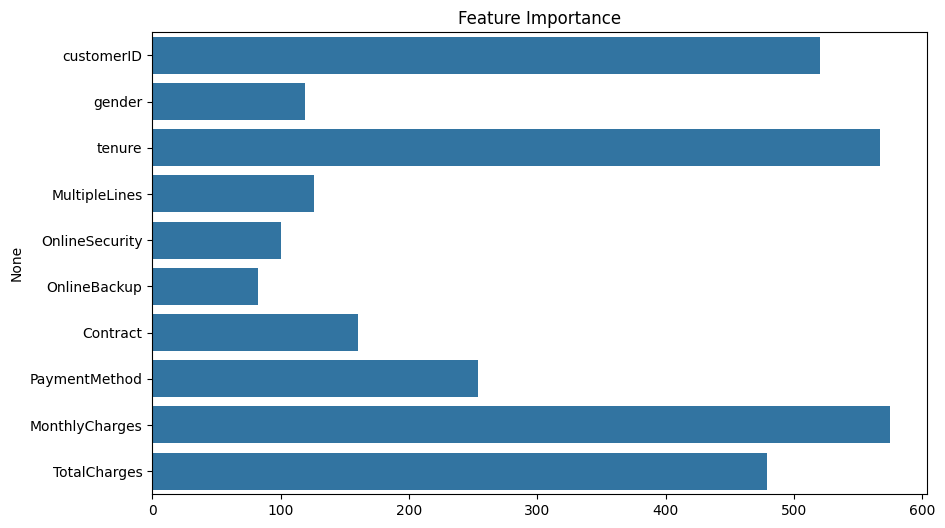

['model.pkl']

In [13]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

#Read Dataset
data=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#churn rate calculation
churn_rate = data['Churn'].value_counts(normalize=True)[1] * 100
print(f"churn_rate : {churn_rate: .2f}%")

#categorical variables
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
  label_encoders[col] = LabelEncoder()
  data[col] = label_encoders[col].fit_transform(data[col])

#Handling the missing values
data.fillna(data.mean(), inplace=True)

#features and target
x = data.drop('Churn' , axis=1)
y = data['Churn']

#features of scale
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

#Handling the class imbalance
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_scaled, y)

#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

#Selection of feature
selector = RFE(LGBMClassifier(), n_features_to_select=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

#Train LightGBM Model
model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42)
model.fit(X_train_selected, y_train)

#Predictions and evaluations
y_pred = model.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("classification Report: \n", classification_report(y_test, y_pred))
print("confusion Matrix: \n", confusion_matrix(y_test, y_pred))

#Feature importance plot
importances = model.feature_importances_
features = x.columns[selector.support_]
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()

#Save Model
joblib.dump(model, 'model.pkl')







VISUALIZATIONS

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

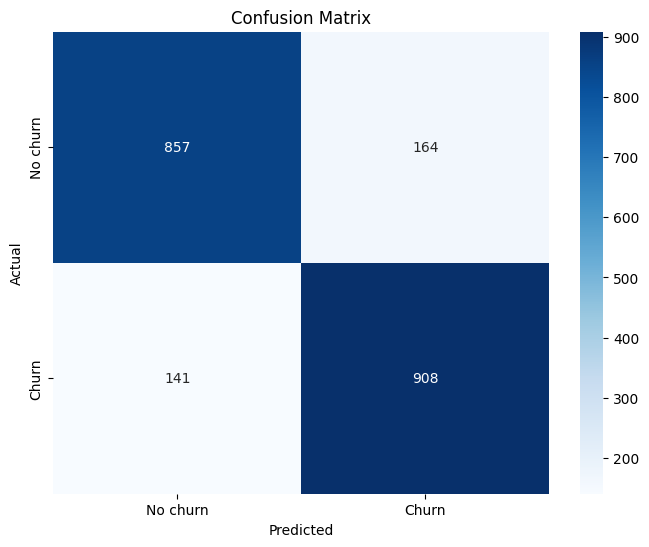

In [14]:
#1. Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No churn', 'Churn'], yticklabels=['No churn', 'Churn'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


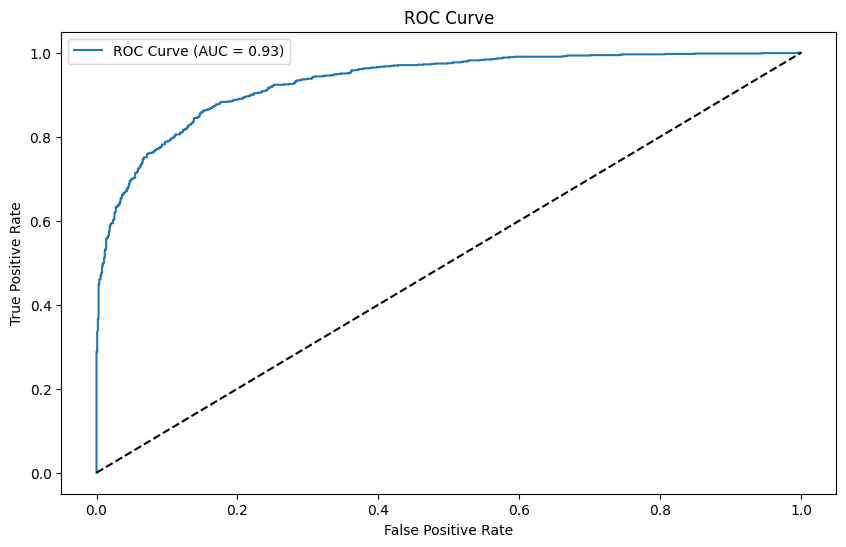

In [15]:
#2. ROC CURVE
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test_selected)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()






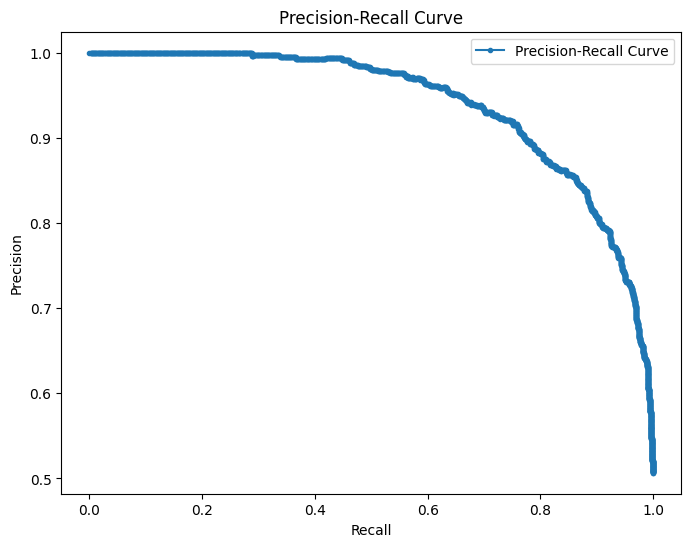

In [16]:
#3. Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

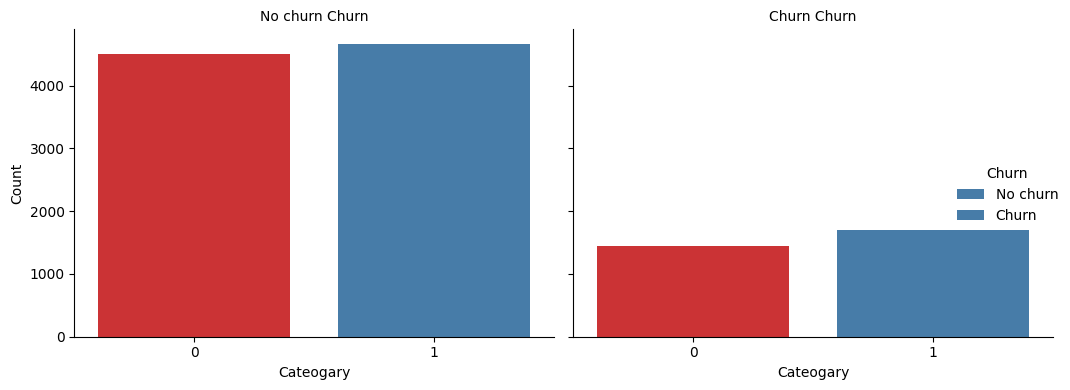

In [17]:
#4. FacetGrid Categorical Churn Analysis

important_categorical_cols = ['PhoneService', 'InternetService', 'TechSupport', 'gender', 'SeniorCitizen']
data_long = data[important_categorical_cols + ['Churn']].copy()
data_long['Churn'] = data_long['Churn'].map({0: 'No churn' , 1: 'Churn'})
g = sns.FacetGrid(data_long, col="Churn", hue="Churn", height=4, aspect=1.2)
g.map(sns.countplot, 'PhoneService', order=[0, 1], palette="Set1")
for col in important_categorical_cols[1:]:
  g.map(sns.countplot, col, order=[0,1], palette="Set1")
g.set_axis_labels('Cateogary', 'Count')
g.set_titles("{col_name} Churn")
g.add_legend()
plt.tight_layout()
plt.show()

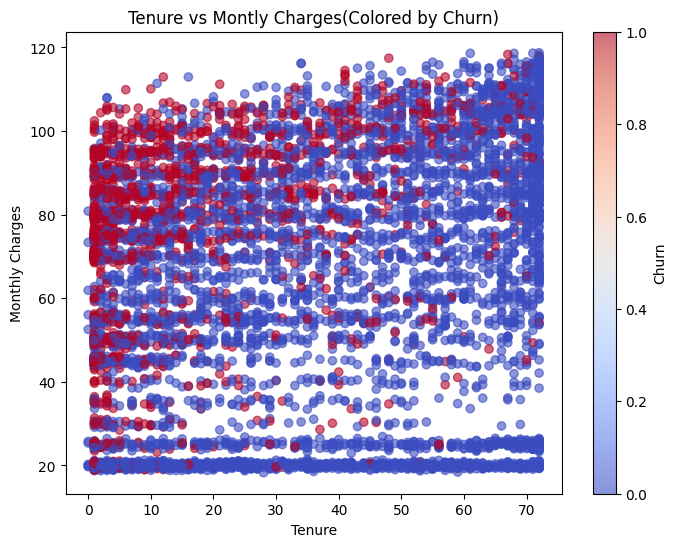

In [ ]:
#5 Scatter Plot of Key features
plt.figure(figsize=(8,6))
plt.scatter(data['tenure'], data['MonthlyCharges'],
            c=data['Churn'],
            cmap='coolwarm',
            alpha=0.6)
plt.title('Tenure vs Montly Charges(Colored by Churn)', fontsize=12)
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.colorbar(label='Churn')

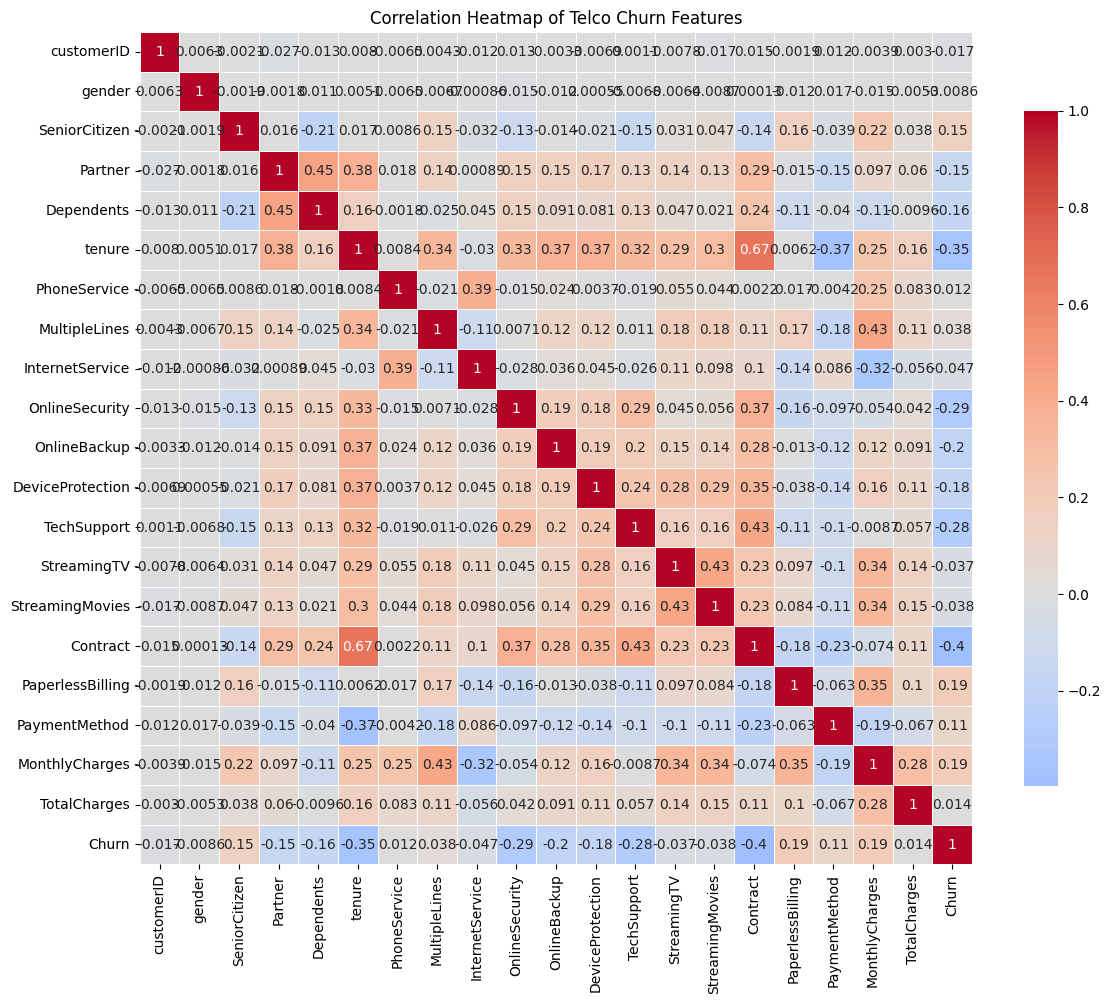

In [21]:
#6 Correlation Heatmap with Seaborn
plt.figure(figsize=(12,10))
numeric_data = data.copy()
for col in numeric_data.select_dtypes(include='object').columns:
    numeric_data[col] = LabelEncoder().fit_transform(numeric_data[col])

correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Telco Churn Features')
plt.tight_layout()
plt.show()

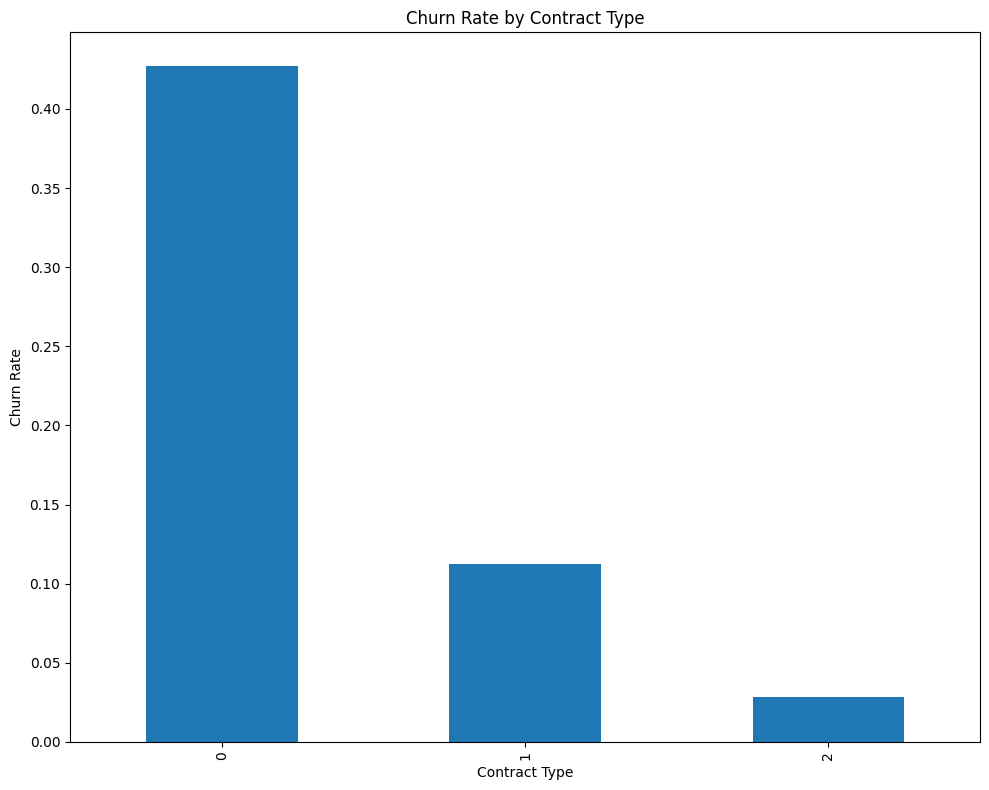

In [26]:
#7 Distribution of churn by contract type
plt.figure(figsize=(10,8))
contract_churn = data.groupby('Contract')['Churn'].mean()
contract_churn.plot(kind='bar')
plt.title('Churn Rate by Contract Type', fontsize=12)
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.show()

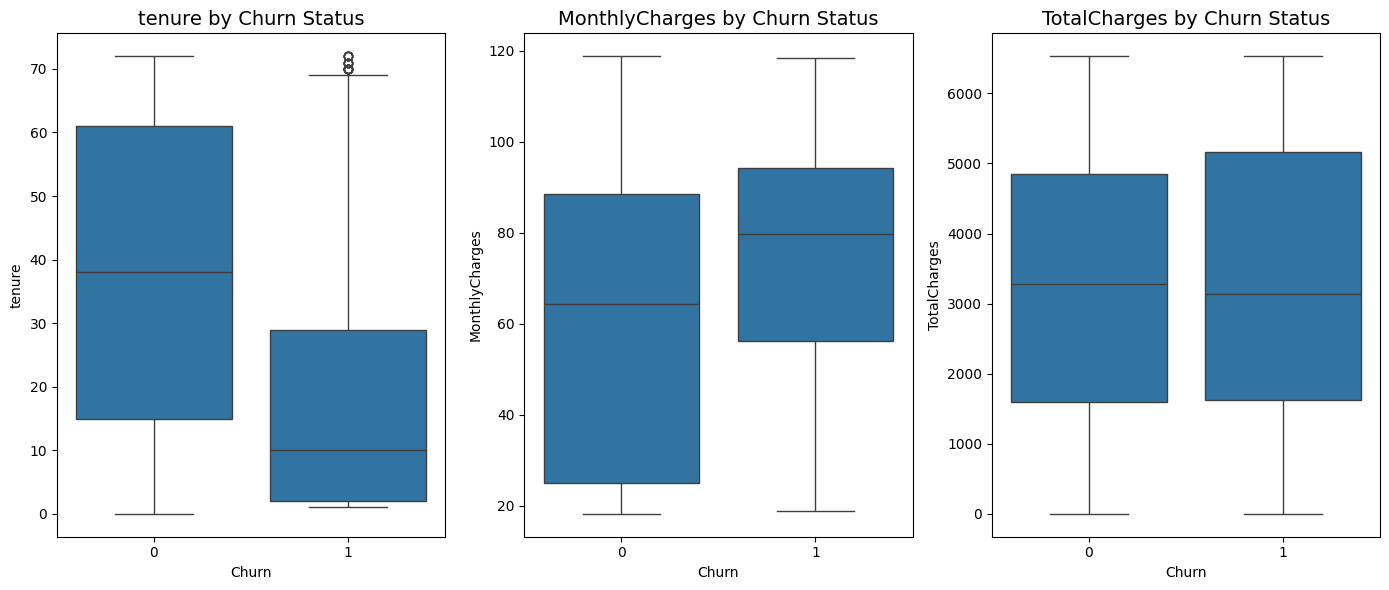

In [36]:
#8 Boxplot of Numerical Features by Churn
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
plt.figure(figsize=(14, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=col, data=data)
    plt.title(f'{col} by Churn Status', fontsize=14)

plt.tight_layout()
plt.show()

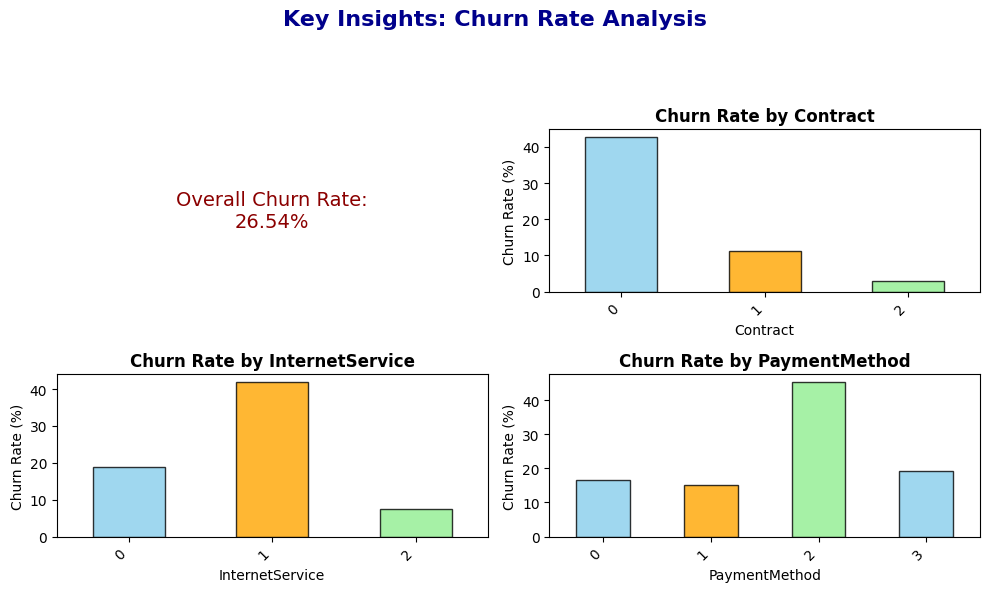

In [35]:
#Additional insights

# Calculate insights
overall_churn_rate = data['Churn'].mean() * 100

# Churn rates by selected key categorical variables
key_categorical_cols = ['Contract', 'InternetService', 'PaymentMethod']
churn_insights = {}
for col in key_categorical_cols:
    churn_insights[col] = data.groupby(col)['Churn'].mean() * 100

# Plot key insights with highlights
plt.figure(figsize=(10, 6), facecolor='white')
plt.suptitle("Key Insights: Churn Rate Analysis", fontsize=16, fontweight='bold', color='darkblue')

# Overall churn rate
plt.subplot(2, 2, 1, facecolor='white')
plt.text(0.5, 0.5, f"Overall Churn Rate:\n{overall_churn_rate:.2f}%",
         fontsize=14, ha='center', va='center', color='darkred')
plt.axis('off')

# Churn by categorical variables
for i, col in enumerate(key_categorical_cols, 2):
    plt.subplot(2, 2, i, facecolor='white')
    churn_data = churn_insights[col]
    churn_data.plot(kind='bar', color=['skyblue', 'orange', 'lightgreen'], edgecolor='black', alpha=0.8)
    plt.title(f"Churn Rate by {col}", fontsize=12, fontweight='bold')
    plt.ylabel('Churn Rate (%)')
    plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Leave space for the main title
plt.show()